In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from utils.train_test_split import train_test_split
from utils.cross_validation import cross_validate
from utils.estimators import DecisionTree
import utils.metrics as metrics

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [16]:
# we assume we are running from ./experimentacion

gene_dataset = pd.read_csv("../catedra/datos/data.csv", delimiter=',', encoding="utf-8")
X = gene_dataset.drop("target", axis=1).to_numpy()
y = gene_dataset.target.to_numpy()

X_train, y_train = X, y #, X_test, y_test = train_test_split(X, y)

In [17]:
# ej. 2.1
model = DecisionTree(max_depth=3)
trained_model = model.clone().fit(X_train, y_train)

---accuracy---
tot:0.67,    
 mean_train:0.8104999999999999, split_train:[0.815  0.8125 0.7975 0.82   0.8075],    
 mean_val:0.67, split_val:[0.71 0.65 0.6  0.66 0.73]
---auprc---
tot:0.45359550373554836,    
 mean_train:0.7640494949418419, split_train:[0.78028695 0.76715018 0.75580373 0.76159647 0.75541015],    
 mean_val:0.4809754375594192, split_val:[0.51681042 0.42718928 0.4348078  0.63496755 0.39110214]


<Figure size 1000x1000 with 0 Axes>

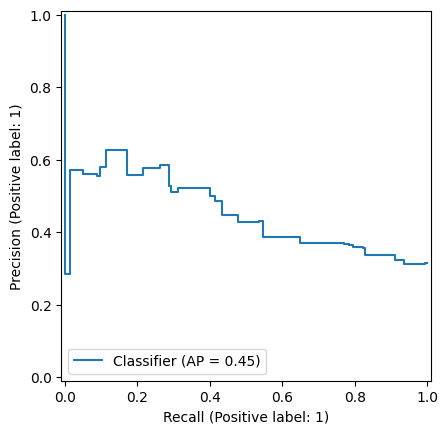

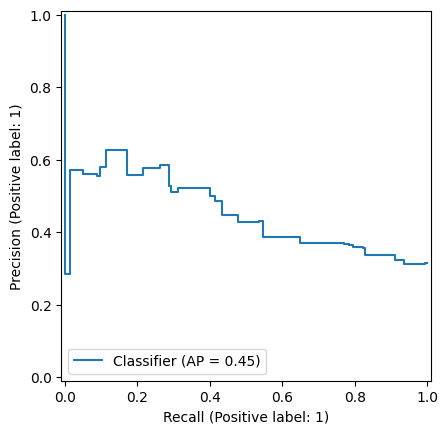

---aucroc---
tot:0.41064232790477423,    
 mean_train:0.17527064370503787, split_train:[0.16583273 0.17456    0.15208261 0.22414842 0.15972946],    
 mean_val:0.42323468395071917, split_val:[0.3582261  0.39866728 0.42169238 0.52407667 0.41351099]


<Figure size 1000x1000 with 0 Axes>

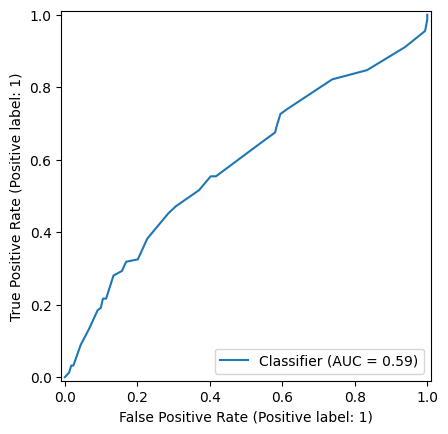

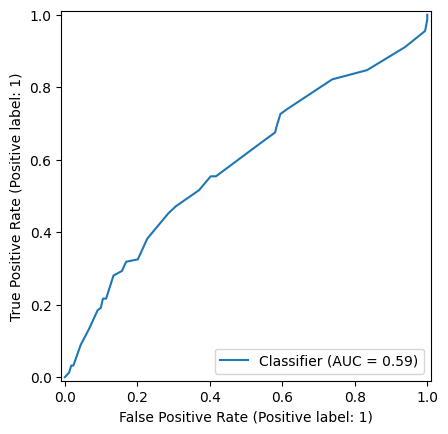

In [18]:
# ej. 2.2

# accuracy
acc_split_train, acc_split_val, acc_y_pred = cross_validate(model, X_train, y_train, metrics.accuracy, False)
acc_tot = metrics.accuracy(y_train, acc_y_pred)
acc_mean_train = acc_split_train.mean()
acc_mean_val = acc_split_val.mean()
print(
    f"---accuracy---\ntot:{acc_tot},\
    \n mean_train:{acc_mean_train}, split_train:{acc_split_train},\
    \n mean_val:{acc_mean_val}, split_val:{acc_split_val}")

# auprc
auprc_split_train, auprc_split_val, auprc_y_prob = cross_validate(model, X_train, y_train, metrics.auprc, True)
auprc_tot = metrics.auprc(y_train, auprc_y_prob)
auprc_mean_train = auprc_split_train.mean()
auprc_mean_val = auprc_split_val.mean()
print(
    f"---auprc---\ntot:{auprc_tot},\
    \n mean_train:{auprc_mean_train}, split_train:{auprc_split_train},\
    \n mean_val:{auprc_mean_val}, split_val:{auprc_split_val}")
plt.figure(figsize=(10, 10))
PrecisionRecallDisplay.from_predictions(y_train, auprc_y_prob).plot()
plt.show()

# aucroc
aucroc_split_train, aucroc_split_val, aucroc_y_prob = cross_validate(model, X_train, y_train, metrics.aucroc, True)
aucroc_tot = metrics.aucroc(y_train, aucroc_y_prob)
aucroc_mean_train = aucroc_split_train.mean()
aucroc_mean_val = aucroc_split_val.mean()
print(
    f"---aucroc---\ntot:{aucroc_tot},\
    \n mean_train:{aucroc_mean_train}, split_train:{aucroc_split_train},\
    \n mean_val:{aucroc_mean_val}, split_val:{aucroc_split_val}")
plt.figure(figsize=(10, 10))
RocCurveDisplay.from_predictions(y_train, aucroc_y_prob).plot()
plt.show()